In [16]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context("poster", font_scale=1.1)

%matplotlib inline

In [4]:
# get airbnb & test csv files as a DataFrame
airbnb_df  = pd.read_csv('../input/train_users_2.csv')
test_df    = pd.read_csv('../input/test_users.csv')

# preview the data
airbnb_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
airbnb_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 27.7+ MB
---------------------------

In [33]:
import matplotlib
matplotlib.style.use('ggplot')

In [ ]:
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("talk", font_scale=1.0)

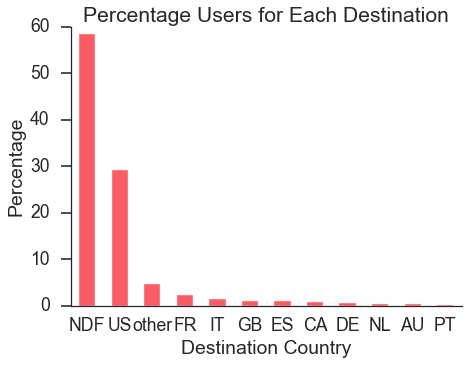

In [39]:
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

fig = plt.figure(figsize=(7,5))

destination_percentage = airbnb_df['country_destination'].value_counts() / airbnb_df.shape[0] * 100
destination_percentage.plot(kind='bar',color='#FD5C64', rot=0)
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
plt.title('Percentage Users for Each Destination')
sns.despine()

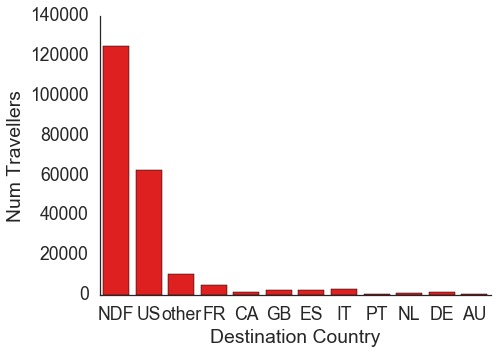

In [23]:
fig = plt.figure(figsize=(7,5))
sns.countplot(x="country_destination",data=airbnb_df,color='red')
plt.xlabel('Destination Country')
plt.ylabel('Num Travellers')
sns.despine()

Most people do not book. After that, people book domestic, then everywhere else, then 

In [19]:
airbnb_df.groupby("country_destination").count()["id"].sort_values(ascending=False)

country_destination
NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: id, dtype: int64

In [18]:
airbnb_df.groupby(airbnb_df["country_destination"]!="NDF").count()["id"].sort_values(ascending=False)

country_destination
False    124543
True      88908
Name: id, dtype: int64

In [14]:
len(airbnb_df)

213451

In [16]:
(62000+124543)/213451

0.8739382809169317

In [20]:
62/88

0.7045454545454546

In [22]:
124543/213451

0.5834734904029496

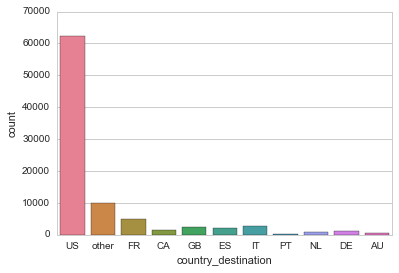

In [21]:
#Let's see the heights without NDF overtowering them all.
sns.countplot(x="country_destination",data=airbnb_df[airbnb_df.country_destination!='NDF'],palette='husl')

In [9]:
airbnb_df.groupby("country_destination").count()["id"].order(ascending=False)

c:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


country_destination
NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: id, dtype: int64

In [76]:
kaggle_scores = {'Dummy Estimator*':0.8503,'My Score':0.87287,'Best Kaggle Score**':0.88184}
kaggle_df = pd.Series(kaggle_scores)
kaggle = kaggle_df.sort_values(ascending=True)

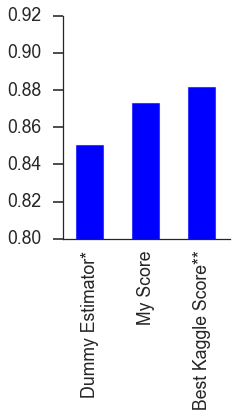

In [85]:
fig = plt.figure(figsize=(3,4))
kaggle.plot(kind='bar',rot=90)
plt.ylim([0.80,0.92])
sns.despine()

In [58]:
gender_percentage.T

-unknown-    44.829024
FEMALE       29.534179
MALE         25.504683
OTHER         0.132115
Name: gender, dtype: float64

In [ ]:
#Has the percentage of bookings been going up? Haven't checked. Not clear that it matters anyhow.

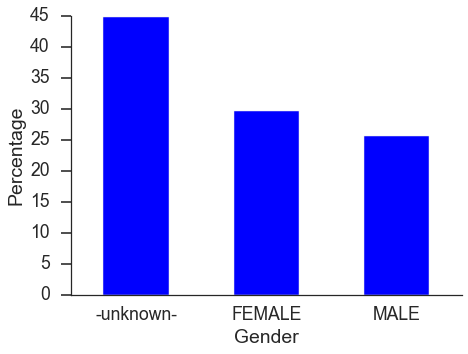

In [61]:
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

fig = plt.figure(figsize=(7,5))

gender_percentage = airbnb_df['gender'].value_counts() / airbnb_df.shape[0] * 100
gender_percentage.drop('OTHER',inplace=True)
#sns.barplot(gender_percentage.T)
gender_percentage.plot(kind='bar',color='blue', rot=0)
plt.xlabel('Gender')
plt.ylabel('Percentage')
sns.despine()

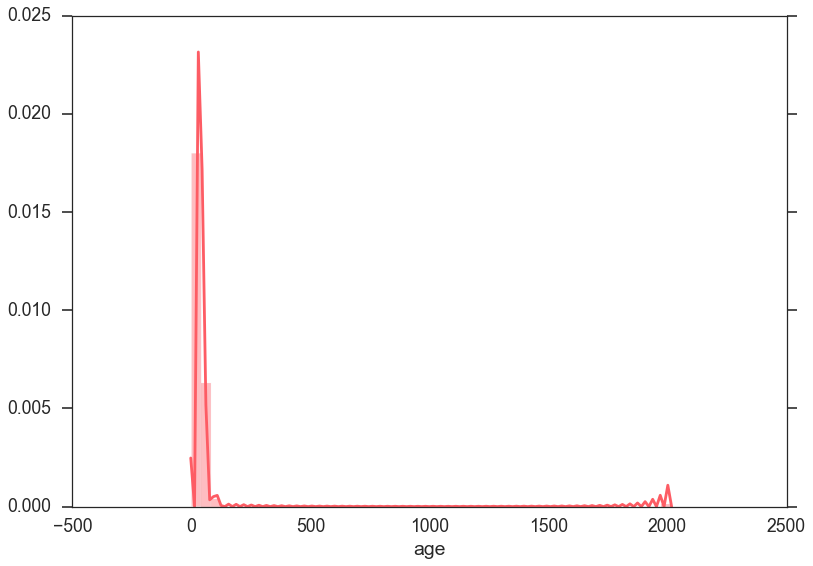

In [60]:

sns.distplot(airbnb_df.age.dropna(), color='#FD5C64')

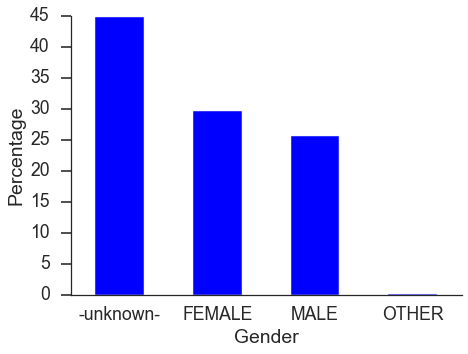

In [59]:
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

fig = plt.figure(figsize=(7,5))

gender_percentage = airbnb_df['age'].value_counts() / airbnb_df.shape[0] * 100
#sns.barplot(gender_percentage.T)
gender_percentage.plot(kind='bar',color='blue', rot=0)
plt.xlabel('Gender')
plt.ylabel('Percentage')
sns.despine()

In [43]:
sns.barplot(x="gender",data=airbnb_df)

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


KeyboardInterrupt: 

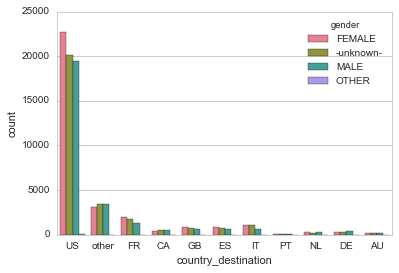

In [23]:
#Let's see the heights without NDF overtowering them all.
sns.countplot(x="country_destination",data=airbnb_df[airbnb_df.country_destination!='NDF'],palette='husl',hue="gender")

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


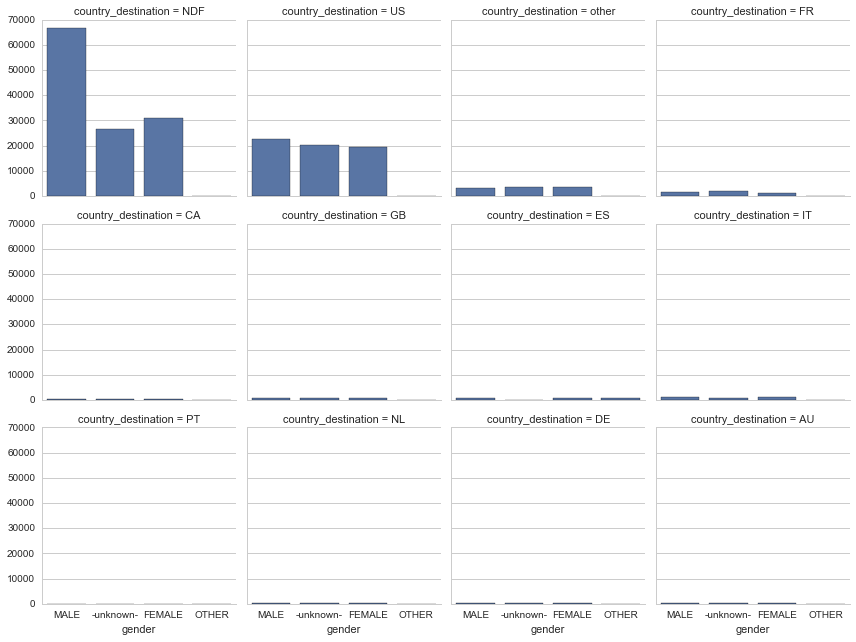

In [38]:
g = sns.FacetGrid(airbnb_df,col="country_destination",col_wrap=4)
#[pd.to_datetime(airbnb_df.date_account_created).apply(lambda x: x.year)>2012]

g.map(sns.countplot,"gender")

#sns.countplot(x="country_destination",data=airbnb_df[airbnb_df.country_destination!='NDF'],palette='husl',hue="gender")

No clear differences in how the genders book in countries. Perhaps men are more likely to use AirBnB? But not according to Kaggle guy . . .

In [40]:
len(airbnb_df[airbnb_df["gender"]=="MALE"])

54440

In [41]:
len(airbnb_df[airbnb_df["gender"]=="FEMALE"])

63041

In [47]:
len(airbnb_df[(airbnb_df["gender"]=="MALE") & (airbnb_df["country_destination"]=="NDF")])

26719

In [46]:
mndf = len(airbnb_df[(airbnb_df["gender"]=="MALE") & (airbnb_df["country_destination"]=="NDF")])
wndf = len(airbnb_df[(airbnb_df["gender"]=="FEMALE") & (airbnb_df["country_destination"]=="NDF")])


31048

In [32]:
(pd.to_datetime(airbnb_df.date_account_created).apply(lambda x: x.year)>2012).sum()

159426